In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns

Importing the File 

In [2]:
tbank = student=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
tbank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
tbank.shape

(5000, 14)

In [34]:
tbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 468.8 KB


In [36]:
tbank.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


Checking for any missing values using the heatmap

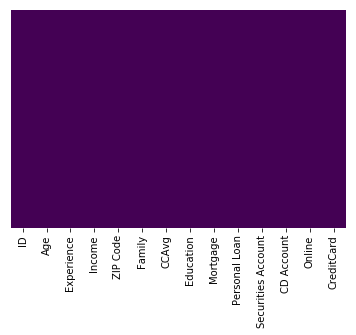

In [6]:
sns.heatmap(tbank.isnull(),yticklabels=False,cbar=False,cmap='viridis')

from the Heat map it is infered there are no missing Values 

Studying the data distribution in each attribute

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

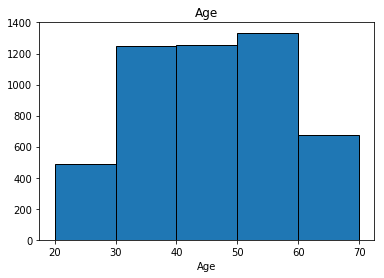

In [8]:
##frequency distribution of age
plt.hist(tbank.Age, 5, range=(20, 70), edgecolor='black')
plt.title('Age')
plt.xlabel('Age')
plt.show()

The distribution of age in the given dataset looks close to normal. Hence the dataset maybe viewed as one which gives fair representation of all age groups.

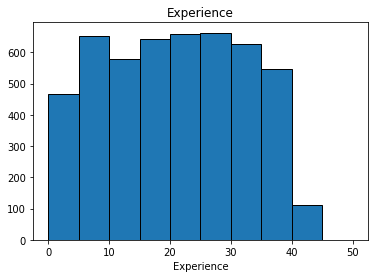

In [10]:
##frequency distribution of experience
plt.hist(tbank.Experience, 10, range=(0, 50), edgecolor='black')
plt.title('Experience')
plt.xlabel('Experience')
plt.show()

The distribution of experience in the given dataset looks close to a uniform distribution. Hence the dataset maybe viewed as one which gives fair representation of all experience groups. 

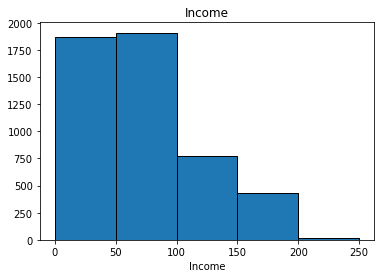

In [11]:
##frequency distribution of income
plt.hist(tbank.Income, 5, range=(0, 250), edgecolor='black')
plt.title('Income')
plt.xlabel('Income')
plt.show()

The distribution of income in the given dataset looks a little right-skewed. Hence there might arise a need to remove outlier rows based on this feature. 

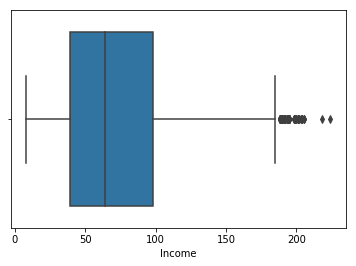

In [13]:
sns.boxplot(x=tbank["Income"])

The data is confirmed being Right skewed from the aboe boxplot hence the need to remove outliers

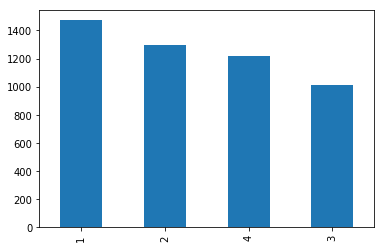

In [15]:
##frequency distribution of number of family members
tbank["Family"].value_counts().plot(kind='bar')
plt.show()

The distribution looks right skewed and might call for removal of outlier 

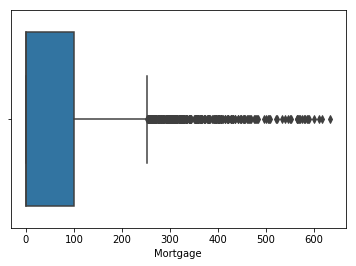

In [17]:
sns.boxplot(x=tbank["Mortgage"])

The mortgage variable is highly right skewed in the given dataset, which is evident from the boxplot above & the frequency distribution below. 

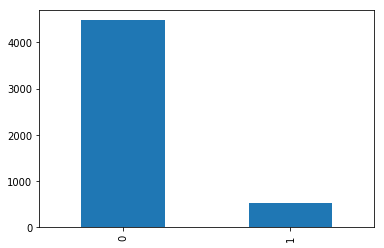

In [19]:
##frequency distribution of securities account availed or not
tbank["Securities Account"].value_counts().plot(kind='bar')
plt.show()

The number of people who have availed securities accounts are nominal compared with the number of those not availed.

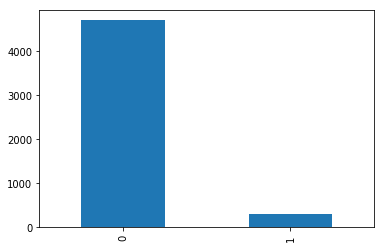

In [20]:
##frequency distribution of CD account availed or not
tbank["CD Account"].value_counts().plot(kind='bar')
plt.show()

The number of people who have availed CD accounts are nominal compared with the number of those not availed.

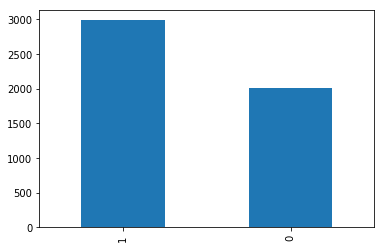

In [21]:
##frequency distribution of internet banking availed or not
tbank["Online"].value_counts().plot(kind='bar')
plt.show()

More number of people in the given dataset are using internet banking than those not using the same. However the number of people who are not using internet banking is quite high. 

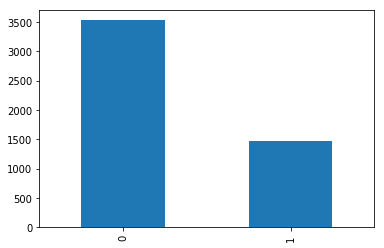

In [22]:
##frequency distribution of usage of universal bank credit card
tbank["CreditCard"].value_counts().plot(kind='bar')
plt.show()

A large chunk of the people in the dataset do not use the Universal Bank credit card. 

The Target column

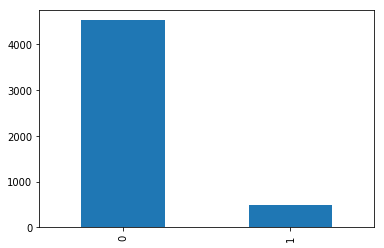

In [24]:
##frequency distribution of those who availed personal loan or not
tbank["Personal Loan"].value_counts().plot(kind='bar')
plt.show()

In [26]:
len(tbank['ZIP Code'].unique().tolist())

467

Since there are too many unique Zip codes, hence we would have to drop the column as it would increase the accuracy of the model. 
The column is being dropped because grouping the Zip codes seems impossible as all belong to the same state
The Column "ID" can also be dropped as it is of no significance 

In [27]:
##dropping the columns ID & ZIP Codes
tbank.drop(columns = ["ID", "ZIP Code"], inplace = True)
tbank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [33]:
##removing outliers from the columns Income & CCAvg
a = tbank["Income"].quantile(0.25)
b = tbank["Income"].quantile(0.75)
IQR1 = b-a

tbank_noout1 = tbank[~((tbank["Income"] < (a - 1.5 * IQR1)) |(tbank["Income"] > (b + 1.5 * IQR1)))]

c = tbank_noout1["CCAvg"].quantile(0.25)
d = tbank_noout1["CCAvg"].quantile(0.75)
IQR2 = d-c

tbank_noout2 = tbank_noout1[~((tbank_noout1["CCAvg"] < (c - 1.5 * IQR2)) |(tbank_noout1["CCAvg"] > (d + 1.5 * IQR2)))]

print(tbank_noout1.shape)
print(tbank_noout2.shape)

(4904, 12)
(4623, 12)


The describe function showed the minimum value of Experience column as -3. Hence we investigate further to check if there are more negative values in the Experience column

In [39]:
##displaying all rows wtih negative values under the Experience column
dftemp = tbank_noout2[(tbank_noout2['Experience'] < 0)]  
dftemp.shape

(47, 12)

Since there are a large number of negative values , from looking at the data it is understood they are more close to Zero, hence dropping the values would be a ideal option to improve the quality of data , as replacing them with actual values is not possible.

In [41]:
##dropping the rows with Experience shown as negative values
tbank_final = tbank_noout2[tbank_noout2["Experience"] >= 0]
tbank_final.shape

(4576, 12)

In [42]:
tbank_mod = tbank_final

Splitting data into target and independent varilables

In [43]:
y = tbank_mod['Personal Loan']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [44]:
X=tbank_mod.drop(['Personal Loan'] ,1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


 Splitting Data into training and test in the ratio of 70:30

In [45]:
from sklearn.model_selection import train_test_split
tbank_mod.shape

(4576, 12)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [47]:
X_train.shape

(3203, 11)

Buliding a Logistic Regression Model

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
logmodel = LogisticRegression()
model = logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
predictions = logmodel.predict(X_test)

In [60]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
##printing the confusion matrix
confusion_matrix(y_test,predictions)

array([[1256,   12],
       [  44,   61]], dtype=int64)

In [52]:
model.score(X_train, y_train)

0.9628473306275367

In [53]:
model.score(X_test, y_test)

0.9592134013109979

In [54]:
accuracy_score(y_test, model.predict(X_test))

0.9592134013109979

Building a KNN model

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [77]:
##scaling the independent variables
X_train_scaled = zscore(X_train)
X_test_scaled = zscore(X_test)

In [85]:
##printing accuracy scores and cross validated AUC scores
for k in (3,5,7,9):
    k_value = k
    neigh = KNeighborsClassifier(n_neighbors = k_value, metric = 'euclidean', algorithm  = 'auto')
    neigh.fit(X_train_scaled, y_train) 
    y_pred = neigh.predict(X_test_scaled)
    print("Accuracy is", accuracy_score(y_test, y_pred)," for K-Value:", k_value)
    
    kfold2 = KFold(n_splits = 10, random_state =1)
    scoring = 'roc_auc'
    results = cross_val_score(neigh, X, y, cv=kfold2, scoring = scoring)
    print("AUC: %0.3f" %(results.mean()))

Accuracy is 0.965768390386016  for K-Value: 3
AUC: 0.827
Accuracy is 0.9635833940276766  for K-Value: 5
AUC: 0.869
Accuracy is 0.9592134013109979  for K-Value: 7
AUC: 0.889
Accuracy is 0.9570284049526584  for K-Value: 9
AUC: 0.900


In [87]:
##printing the confusion matrix
confusion_matrix(y_test,y_pred)

array([[1266,    2],
       [  57,   48]], dtype=int64)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1268
           1       0.96      0.46      0.62       105

   micro avg       0.96      0.96      0.96      1373
   macro avg       0.96      0.73      0.80      1373
weighted avg       0.96      0.96      0.95      1373



Naïve Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
##fitting a Naive_Bayes model
gaussmod = GaussianNB()
gaussmod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [92]:
predicted = gaussmod.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
##printing classification report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1268
           1       0.42      0.52      0.46       105

   micro avg       0.91      0.91      0.91      1373
   macro avg       0.69      0.73      0.71      1373
weighted avg       0.92      0.91      0.91      1373



In [95]:
##printing the confusion matrix
confusion_matrix(y_test,predicted)

array([[1191,   77],
       [  50,   55]], dtype=int64)

In [96]:
accuracy_score(y_test, predicted)

0.9075018208302986

In [98]:
kfold3 = KFold(n_splits = 10, random_state =1)
scoring = 'roc_auc'
results = cross_val_score(gaussmod, X, y, cv=kfold2, scoring = scoring)
print("AUC: %0.3f" %(results.mean()))

AUC: 0.937


Give your reasoning on which is the best model in this case and why it performs better? (5 points)

Comparing the accuracy scores and AUC scores of all the three models

The logistic regression model has the best AUROC of 0.965 compared with the AUROC values of 0.9 for KNN and 0.937 for the Naive-Bayes models. 

Generally ,Logistic regression performs better when the actual decision boundaries are linear. The dataset in this case clearly has linear decision boundaries as evident from the results. 

Hence for this particular model, Logistic Regression is the best Model according to me.